In [1]:
import pandas as pd
import numpy as np
from ISLP.models import (ModelSpec as MS, summarize, poly)
import statsmodels.api as sm
from statsmodels.formula.api import ols
from matplotlib.pyplot import subplots
from statsmodels.stats.anova import anova_lm
from ISLP import load_data

# Exercice 8
a = pd.read_csv("/Users/julien/Downloads/Auto.csv")

a[["horsepower","mpg"]].describe()


,horsepower,mpg
count,392.000000,392.000000
mean,104.469388,23.445918
std,38.491160,7.805007
min,46.000000,9.000000
25%,75.000000,17.000000
50%,93.500000,22.750000
75%,126.000000,29.000000
max,230.000000,46.600000


In [657]:
design = MS(["horsepower"]).fit(a)
X = design.transform(a)
y = a["mpg"]
model = sm.OLS(y, X)
results = model.fit()
summarize(results)

# i. Looking at the pvalue for the horsepower predictor, there is a statistically significant relationship between this predictor and the response
# ii. The coefficient is small but when you look at the values of horsepower and mpg it's actually quite significant. So it's a strong relationship.
# iii. It's negative: the more horsepower, the less mpg

,coef,std err,t,P>|t|
intercept,39.9359,0.717,55.660,0.0
horsepower,-0.1578,0.006,-24.489,0.0


In [658]:
new_df = pd.DataFrame({"horsepower":[98]})
newX = design.transform(new_df)
predictions = results.get_prediction(newX)
predictions.predicted_mean
predictions.conf_int(obs=True, alpha=0.05)

array([[14.80939607, 34.12475823]])

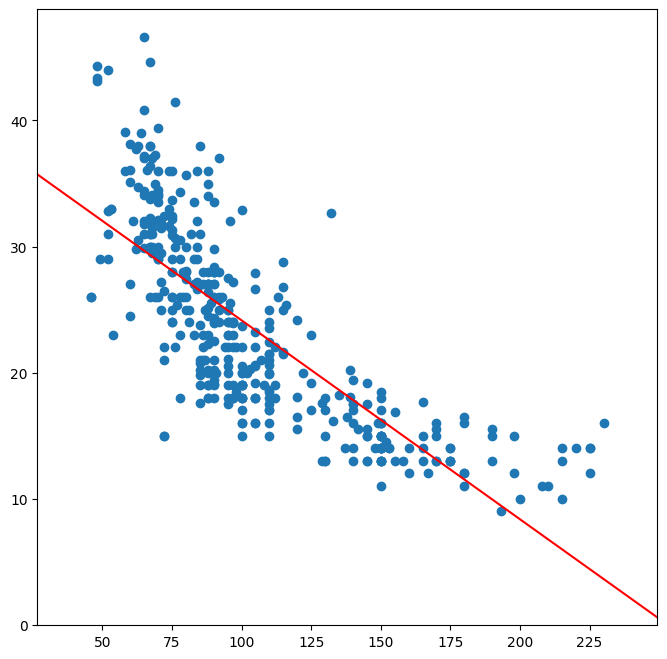

In [659]:
_, ax = subplots(figsize=(8,8))
ax.scatter(X["horsepower"], y)
xlim = ax.get_xlim()
ax.axline((xlim[0], results.params[0]+xlim[0]*results.params[1]), (xlim[1], results.params[0]+xlim[1]*results.params[1]), color="r");

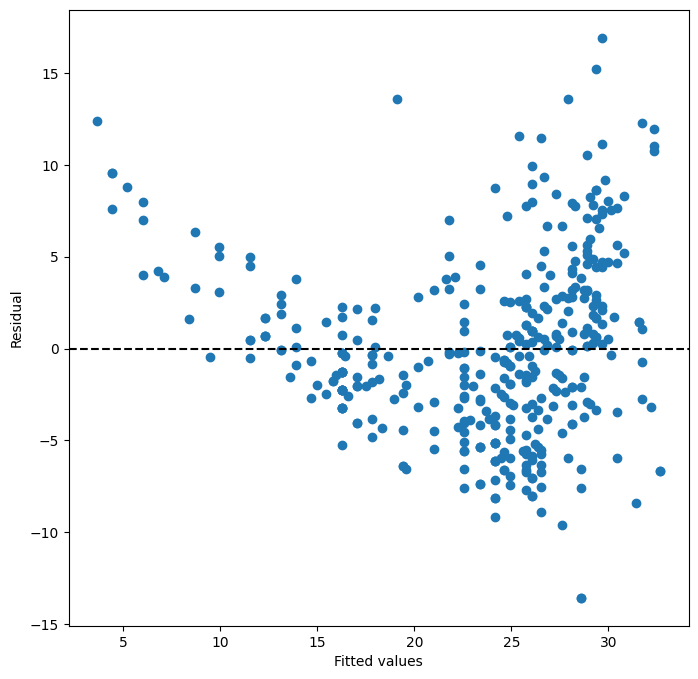

In [660]:
ax =subplots(figsize=(8,8))[1]
ax.scatter(results.fittedvalues, results.resid)
ax.set_xlabel("Fitted values")
ax.set_ylabel("Residual")
ax.axhline(0, c="k",ls="--");

# It seems that the residual are increasing when the value of y increase. We would use y = np.log(a["mpg"]) instead.

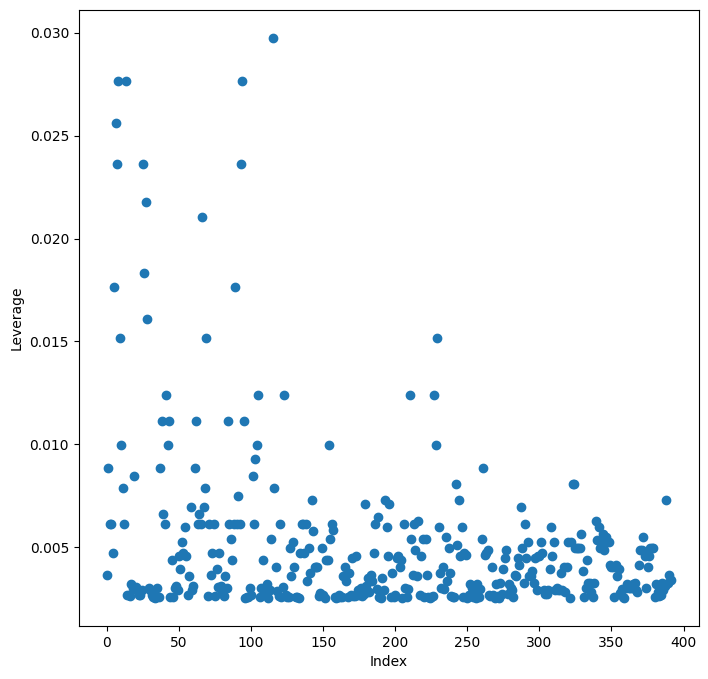

In [661]:
infl = results.get_influence()
ax = subplots(figsize=(8,8))[1]
ax.scatter(np.arange(X.shape[0]), infl.hat_matrix_diag)
ax.set_xlabel("Index")
ax.set_ylabel("Leverage");

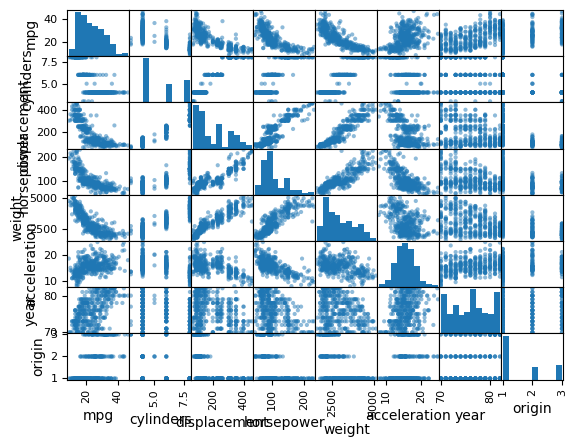

In [662]:
# Exercise 9

pd.plotting.scatter_matrix(a);

In [663]:
a.corr()

/var/folders/sm/ydwhkqhs0snd004sjvdhb0_w0000gn/T/ipykernel_60724/2489384948.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  a.corr()


,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,0.565209
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.568932
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.614535
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.585005
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.212746
year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,0.181528
origin,0.565209,-0.568932,-0.614535,-0.455171,-0.585005,0.212746,0.181528,1.000000


In [664]:
design = MS(a.columns.drop(["mpg","name"])).fit(a)
#a = a.drop(13)
X = design.transform(a)
y = a["mpg"]
model = sm.OLS(y, X)
results2 = model.fit()
summarize(results2)

# ii. All predictors apart of acceleration and a bit horsepower seems to have a statistically significant relationship to the response
# iii. The coefficient of the year variable suggest that as years increase, the mpg will increase. That is newer car get more and more efficient (more miles per gallon).

,coef,std err,t,P>|t|
intercept,-17.2184,4.644,-3.707,0.000
cylinders,-0.4934,0.323,-1.526,0.128
displacement,0.0199,0.008,2.647,0.008
horsepower,-0.0170,0.014,-1.230,0.220
weight,-0.0065,0.001,-9.929,0.000
acceleration,0.0806,0.099,0.815,0.415
year,0.7508,0.051,14.729,0.000
origin,1.4261,0.278,5.127,0.000


In [665]:
results2.fvalue

252.42804529131902

In [666]:
# table = anova_lm(results2) doesn't work



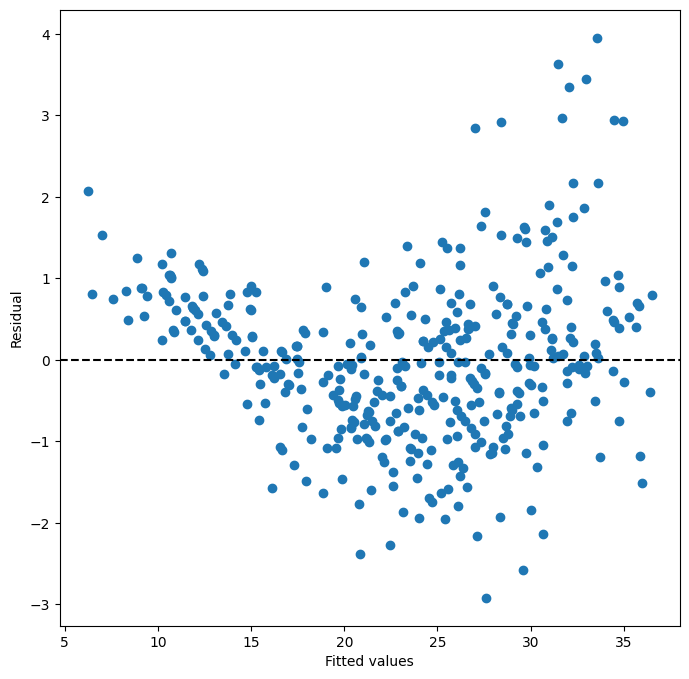

In [667]:
# This is the way to display the residual vs. fitted values that we saw in the lab:
#
# _, ax = subplots(figsize=(8,8))
# ax.scatter(results2.fittedvalues, results2.resid)
# ax.set_xlabel("Fitted values")
# ax.set_ylabel("Residual");
# ax.axhline(0, c="k",ls="--");

# But in the lesson, they talk about the studentized residual that are expected to be between -3 and 3:
infl = results2.get_influence()
ax = subplots(figsize=(8,8))[1]
ax.scatter(results2.fittedvalues, infl.get_resid_studentized_external())
ax.set_xlabel("Fitted values")
ax.set_ylabel("Residual");
ax.axhline(0, c="k",ls="--");

# The residuals seems to be bigger in values when the fitted values increases, which means there is non linearity in the data
# There doens't seem to be huge outliers

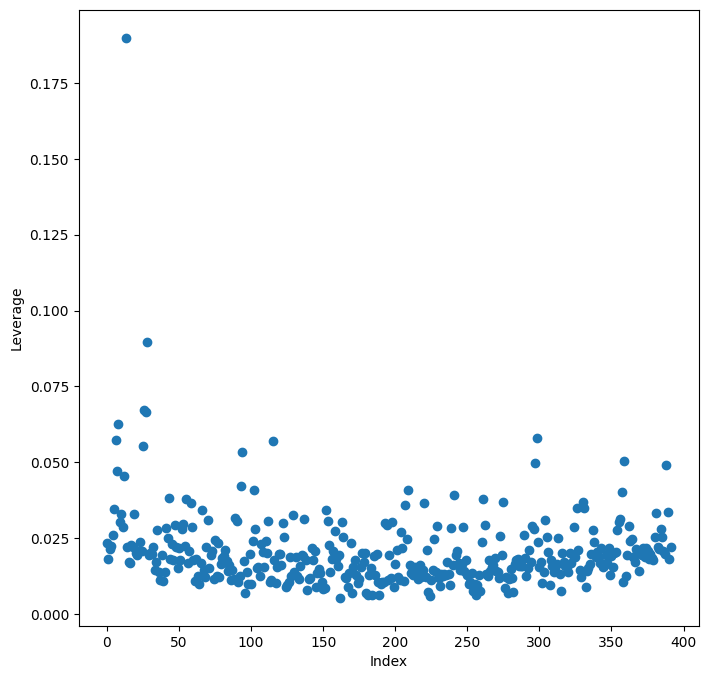

In [668]:
ax = subplots(figsize=(8,8))[1]
ax.scatter(np.arange(X.shape[0]), infl.hat_matrix_diag)
ax.set_xlabel("Index")
ax.set_ylabel("Leverage");
# There seems to be on particular point with high leverage

In [669]:
np.argmax(infl.hat_matrix_diag)

13

In [670]:
# e. Model with interaction terms

allVars = list(a.columns.drop(["mpg","name"]))
allVars = allVars + [("weight","acceleration"),("horsepower","displacement","cylinders")]
design = MS(allVars).fit(a)
X = design.transform(a)
y = a["mpg"]
model = sm.OLS(y, X)
results2 = model.fit()
summarize(results2)

# horsepower x displacement x cylinders seems to be stat sig


,coef,std err,t,P>|t|
intercept,-7.071800,7.139000,-0.991,0.323
cylinders,-0.329300,0.286000,-1.149,0.251
displacement,-0.043500,0.009000,-4.747,0.000
horsepower,-0.142600,0.018000,-7.922,0.000
weight,-0.002300,0.002000,-1.311,0.191
acceleration,0.077400,0.300000,0.258,0.796
year,0.749100,0.045000,16.604,0.000
origin,0.631600,0.255000,2.478,0.014
weight:acceleration,-0.000081,0.000000,-0.803,0.423
horsepower:displacement:cylinders,0.000042,0.000005,7.832,0.000


In [671]:
# f. 

a_ = a.drop(np.argmax(infl.hat_matrix_diag)) # Removing high leverage point

allVars = list(a_.columns.drop(["mpg","name"]))
design = MS(allVars).fit(a_)
X = design.transform(a_)
y = np.log(a_["mpg"])
model = sm.OLS(y, X)
results3 = model.fit()
summarize(results3)

,coef,std err,t,P>|t|
intercept,1.7352,0.166000,10.432,0.000
cylinders,-0.0297,0.012000,-2.554,0.011
displacement,0.0007,0.000000,2.658,0.008
horsepower,-0.0013,0.001000,-2.524,0.012
weight,-0.0003,0.000025,-10.669,0.000
acceleration,-0.0002,0.004000,-0.057,0.955
year,0.0297,0.002000,16.288,0.000
origin,0.0407,0.010000,4.098,0.000


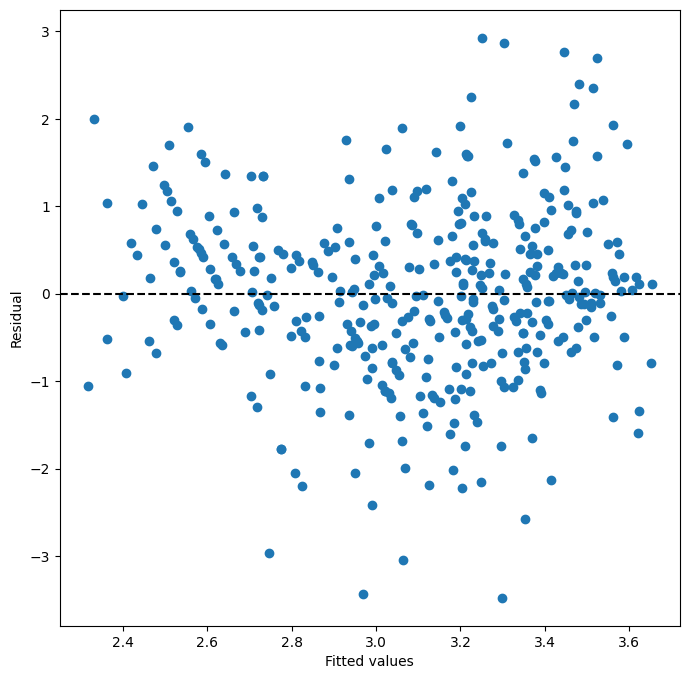

In [672]:
infl = results3.get_influence()
ax = subplots(figsize=(8,8))[1]
ax.scatter(results3.fittedvalues, infl.get_resid_studentized_external())
ax.set_xlabel("Fitted values")
ax.set_ylabel("Residual");
ax.axhline(0, c="k",ls="--");

# All points are now between acceptable range of -3,3

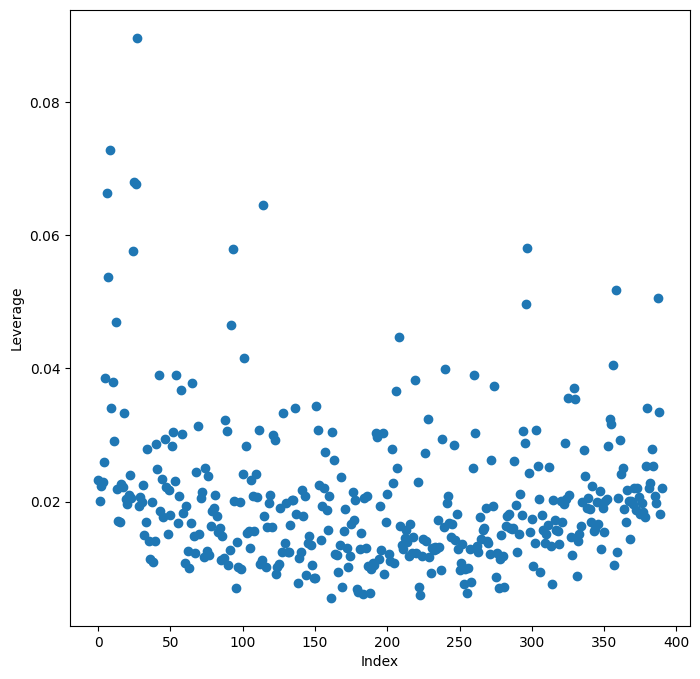

In [673]:
ax = subplots(figsize=(8,8))[1]
ax.scatter(np.arange(X.shape[0]), infl.hat_matrix_diag)
ax.set_xlabel("Index")
ax.set_ylabel("Leverage");
# There is no more point with high leverage

In [674]:
# Exercice 10

c = load_data("Carseats")
c.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [675]:
design = MS(["Price","Urban","US"]).fit(c)
X = design.transform(c)
y = c["Sales"]
model = sm.OLS(y, X)
results = model.fit()
summarize(results)

# b.
# When price is going down, sales are likely to go up
# When the shop is located in an urban area, it will sell less than in a rural area, by 22 units
# When the store is in the US there is more sales than when it's not, by 1.2k

,coef,std err,t,P>|t|
intercept,13.0435,0.651,20.036,0.000
Price,-0.0545,0.005,-10.389,0.000
Urban[Yes],-0.0219,0.272,-0.081,0.936
US[Yes],1.2006,0.259,4.635,0.000


c. 

* if in an US urban area: 
$Sales = \beta_0 + \beta_1*Price + \beta_2*Urban + \beta_3*US$ 
* if in an US rural area: $Sales = \beta_0 + \beta_1*Price + \beta_3*US$ 
* if in a non US urban area: $Sales = \beta_0 + \beta_1*Price + \beta_2*Urban$
* if in a non US rural area: $Sales = \beta_0 + \beta_1*Price$

d. Urban is not a statistically significant predictor of Sales. So whether the store is in an urban area or not doesn't influence the amount of sales

In [676]:
design = MS(["Price","US"]).fit(c)
X = design.transform(c)
model = sm.OLS(y, X)
results2 = model.fit()
summarize(results2)

,coef,std err,t,P>|t|
intercept,13.0308,0.631,20.652,0.0
Price,-0.0545,0.005,-10.416,0.0
US[Yes],1.1996,0.258,4.641,0.0


In [677]:
anova_lm(results, results2)


,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,396.0,2420.834671,0.0,NaN,NaN,NaN
1,397.0,2420.874462,-1.0,-0.03979,0.006525,NaN


In [678]:
print(f"{results.fvalue} - {results2.fvalue}")
# From anova ther is no clear evidence that the model in f fits the data better. However, the model in f increased the F statistic by quite a bit.

41.51877229129553 - 62.431137682371414


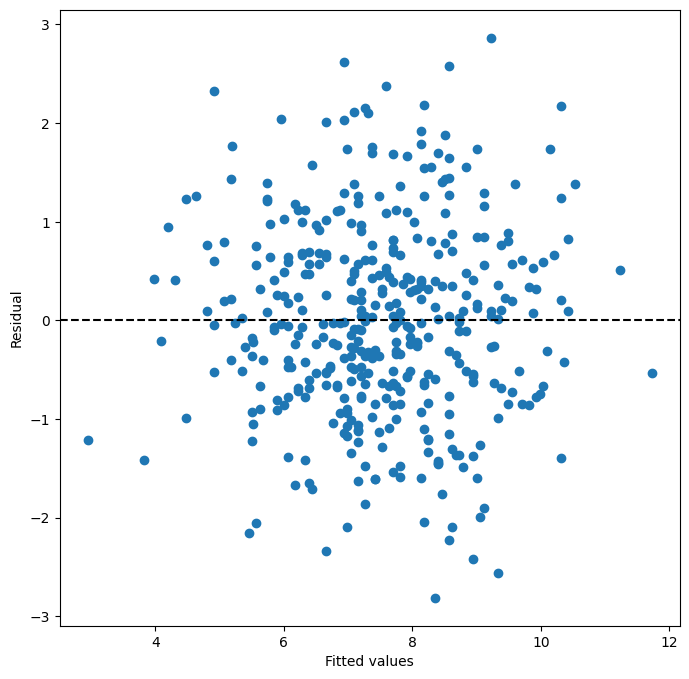

In [679]:
infl = results2.get_influence()
ax = subplots(figsize=(8,8))[1]
ax.scatter(results2.fittedvalues, infl.get_resid_studentized_external())
ax.set_xlabel("Fitted values")
ax.set_ylabel("Residual");
ax.axhline(0, c="k",ls="--");

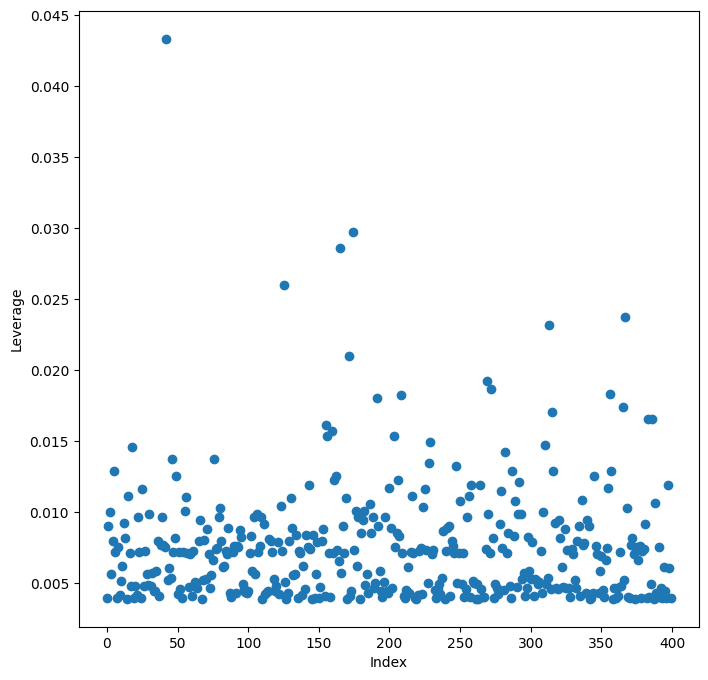

In [680]:
ax = subplots(figsize=(8,8))[1]
ax.scatter(np.arange(X.shape[0]), infl.hat_matrix_diag)
ax.set_xlabel("Index")
ax.set_ylabel("Leverage");

# No outliers and no high leverage point.

In [681]:
# Excercise 11

rng = np.random.default_rng(1)
x = rng.normal(size=100)
y = 2*x + rng.normal(size=100)

In [682]:
dfX = pd.DataFrame({"col0":x})
design = MS(["col0"], intercept=False).fit(dfX)
X = design.transform(dfX)
model = sm.OLS(y, X)
results = model.fit()
#summarize(results)
results.summary()

# t-statistic is high so p>t is low, it means that there is statistically significant relationship between x and y so we can reject the null hypothesis H0

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.743
Model:                            OLS   Adj. R-squared (uncentered):              0.740
Method:                 Least Squares   F-statistic:                              285.6
Date:                Wed, 06 Sep 2023   Prob (F-statistic):                    6.23e-31
Time:                        12:11:06   Log-Likelihood:                         -141.35
No. Observations:                 100   AIC:                                      284.7
Df Residuals:                      99   BIC:                                      287.3
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
col0           1.9762      0.117     16.898      0.000       1.744       2.208
==============================================================================
Omnibus:                        1.376   Durbin-Watson:                   2.184
Prob(Omnibus):                  0.503   Jarque-Bera (JB):                0.847
Skew:                           0.121   Prob(JB):                        0.655
Kurtosis:                       3.381   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [683]:
dfY = pd.DataFrame({"col0":y})
design = MS(["col0"], intercept=False).fit(dfY)
Y = design.transform(dfY)
model = sm.OLS(x, Y)
results = model.fit()
results.summary()

# b. We can also reject the null hyposthesis
# c. The t-statistic is exactly the same.

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.743
Model:                            OLS   Adj. R-squared (uncentered):              0.740
Method:                 Least Squares   F-statistic:                              285.6
Date:                Wed, 06 Sep 2023   Prob (F-statistic):                    6.23e-31
Time:                        12:11:06   Log-Likelihood:                         -58.349
No. Observations:                 100   AIC:                                      118.7
Df Residuals:                      99   BIC:                                      121.3
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
col0           0.3757      0.022     16.898      0.000       0.332       0.420
==============================================================================
Omnibus:                       13.156   Durbin-Watson:                   2.034
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               22.596
Skew:                          -0.528   Prob(JB):                     1.24e-05
Kurtosis:                       5.075   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [684]:
# Exercise 12

#  From 3.38, we deduce that sum(x*y)*(sum(x*x) - sum(y*y)) = 0 means that the coefficient will be the same.
# So either sum(x*y) shoud be 0, or sum(x*x)-sum(y*y) should be 0

# b. cf. previous example in exercise 11
# c. 

rng = np.random.default_rng(1)
x = rng.normal(size=100)
y = -x

np.sum(x*x)-np.sum(y*y)

0.0

In [685]:
dfX = pd.DataFrame({"col0":x})
design = MS(["col0"], intercept=False).fit(dfX)
X = design.transform(dfX)
model = sm.OLS(y, X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          5.065e+32
Date:                Wed, 06 Sep 2023   Prob (F-statistic):                        0.00
Time:                        12:11:06   Log-Likelihood:                          3409.3
No. Observations:                 100   AIC:                                     -6817.
Df Residuals:                      99   BIC:                                     -6814.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
col0          -1.0000   4.44e-17  -2.25e+16      0.000      -1.000      -1.000
==============================================================================
Omnibus:                        6.319   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.042   Jarque-Bera (JB):                5.986
Skew:                           0.459   Prob(JB):                       0.0501
Kurtosis:                       3.771   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [686]:
dfY = pd.DataFrame({"col0":y})
design = MS(["col0"], intercept=False).fit(dfY)
Y = design.transform(dfY)
model = sm.OLS(x, Y)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          5.065e+32
Date:                Wed, 06 Sep 2023   Prob (F-statistic):                        0.00
Time:                        12:11:06   Log-Likelihood:                          3409.3
No. Observations:                 100   AIC:                                     -6817.
Df Residuals:                      99   BIC:                                     -6814.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
col0          -1.0000   4.44e-17  -2.25e+16      0.000      -1.000      -1.000
==============================================================================
Omnibus:                        6.319   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.042   Jarque-Bera (JB):                5.986
Skew:                          -0.459   Prob(JB):                       0.0501
Kurtosis:                       3.771   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [687]:
# Exercise 13

rng = np.random.default_rng(1)
x = rng.normal(size=100,loc=0,scale=1)
eps = rng.normal(size=100,loc=0,scale=0.25)
y = -1 + 0.5*x + eps

# y is 100 observations, B0 is -1 and B1 is 0.5

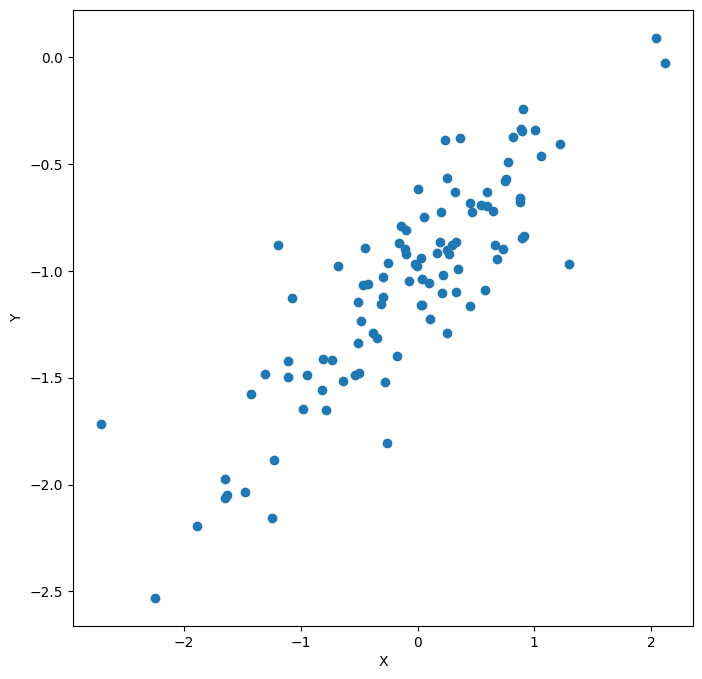

In [688]:
ax = subplots(figsize=(8,8))[1]
ax.scatter(x, y)
ax.set_xlabel("X")
ax.set_ylabel("Y");

# There is a strong indication of a relationship between X and Y. That being said there is noise in the data (thanks to eps)

In [689]:
dfX = pd.DataFrame({"col0":x})
X = MS([poly("col0",degree=2)]).fit_transform(dfX)
model = sm.OLS(y, X)
results = model.fit()
summarize(results)

# p value for the quadratic term is close to 1 which means that there is a strong evidence against it having statistically significant relationship with the response Y.

,coef,std err,t,P>|t|
intercept,-1.0552,0.025,-41.920,0.000
"poly(col0, degree=2)[0]",4.1909,0.252,16.649,0.000
"poly(col0, degree=2)[1]",-0.0131,0.252,-0.052,0.959


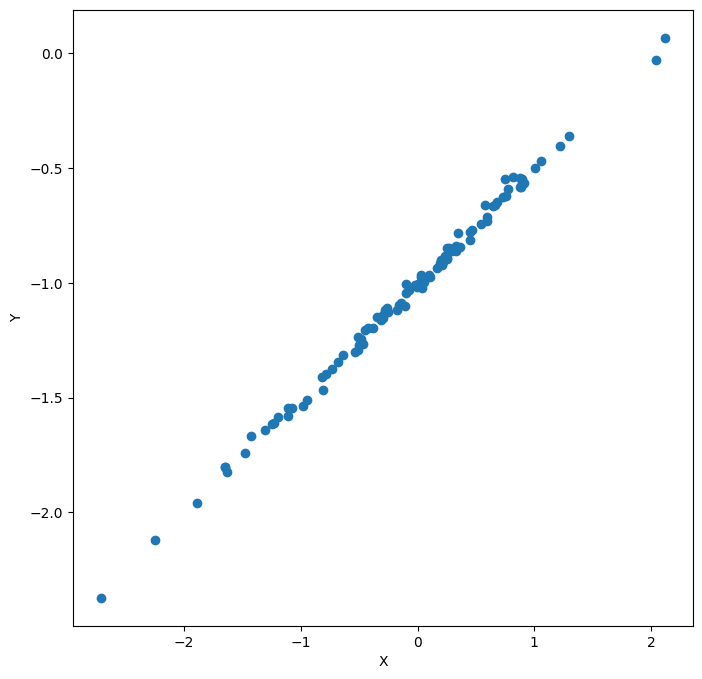

In [690]:
eps = rng.normal(size=100,loc=0,scale=0.025)
y2 = -1 + 0.5*x + eps

ax = subplots(figsize=(8,8))[1]
ax.scatter(x, y2)
ax.set_xlabel("X")
ax.set_ylabel("Y");

# The points are way more closer to the line Y = -1 + 0.5*X

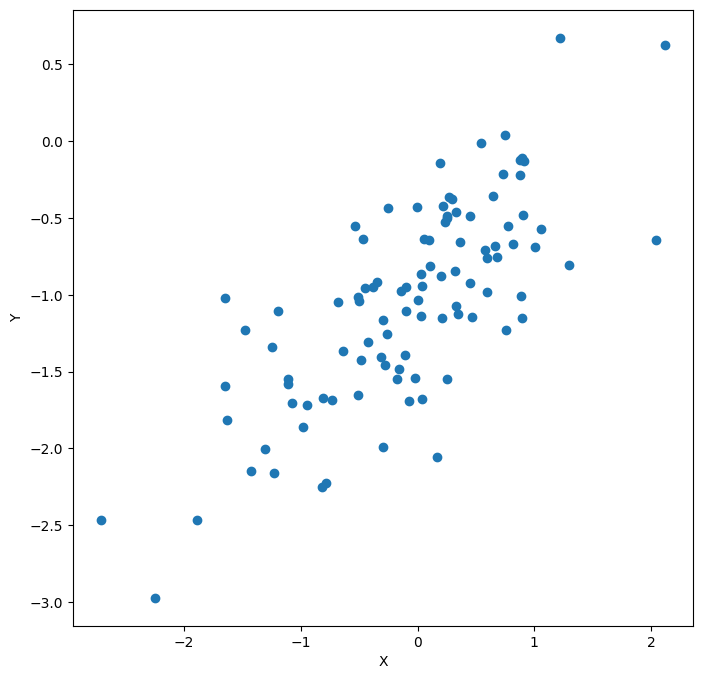

In [691]:
eps = rng.normal(size=100,loc=0,scale=0.5)
y3 = -1 + 0.5*x + eps

ax = subplots(figsize=(8,8))[1]
ax.scatter(x, y3)
ax.set_xlabel("X")
ax.set_ylabel("Y");

# The points are way more scattered around the regression line.

In [692]:
dfX = pd.DataFrame({"col0":x})
X = MS(["col0"]).fit_transform(dfX)
model = sm.OLS(y, X)
results = model.fit()
results.conf_int(alpha=0.05)

,0,1
intercept,-1.068891,-0.969122
col0,0.433783,0.550508


In [693]:
model = sm.OLS(y2, X)
results = model.fit()
results.conf_int(alpha=0.05)

,0,1
intercept,-1.008641,-0.999455
col0,0.494307,0.505054


In [694]:
model = sm.OLS(y3, X)
results = model.fit()
results.conf_int(alpha=0.05)

,0,1
intercept,-1.091355,-0.917804
col0,0.471973,0.675021


In [695]:
# The more noise in the data, the bigger the confidence interval.

In [696]:
# Exercice 14

rng = np.random.default_rng(10)
x1 = rng.uniform(0,1,size=100)
x2 = 0.5*x1 + rng.normal(size=100)/10
y = 2 + 2*x1 + 0.3*x2 + rng.normal(size=100)

# B0=2, B1=2, B2=0.3

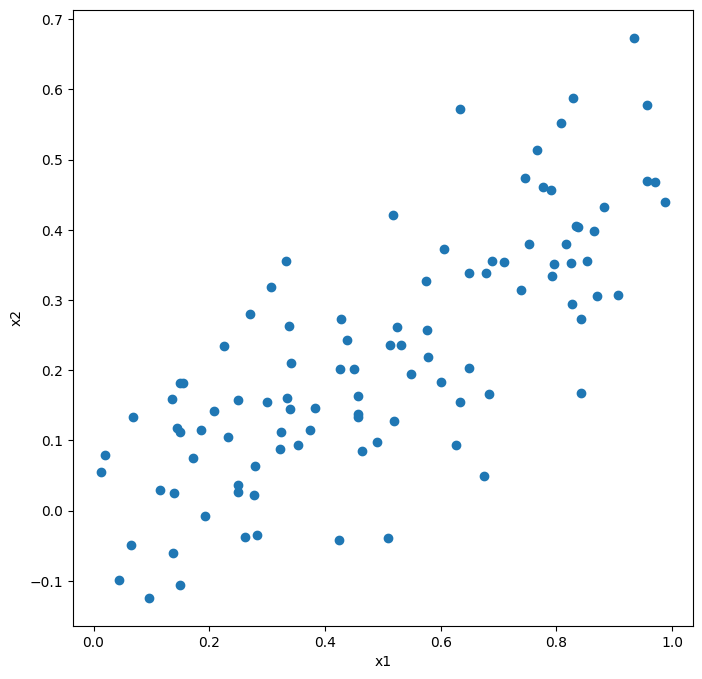

In [697]:
# b. there is a linear relationship between x1 and x2

ax = subplots(figsize=(8,8))[1]
ax.scatter(x1, x2)
ax.set_xlabel("x1")
ax.set_ylabel("x2");

In [698]:
dfX = pd.DataFrame({"x1":x1,"x2":x2})
X = MS(["x1","x2"]).fit_transform(dfX)
model = sm.OLS(y, X)
results = model.fit()
results.summary()

# c. B0=1.95 (real=2), B1=1.6 (real=2) and B2=0.94 (real=0.3)
# We can reject the null hypothesis B1=0 given its p-value is very low (1 per thousand). But we can't reject the null hypothesis B2=0 because its p-value is too high.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.291
Model:                            OLS   Adj. R-squared:                  0.276
Method:                 Least Squares   F-statistic:                     19.89
Date:                Wed, 06 Sep 2023   Prob (F-statistic):           5.76e-08
Time:                        12:11:06   Log-Likelihood:                -130.62
No. Observations:                 100   AIC:                             267.2
Df Residuals:                      97   BIC:                             275.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      1.9579      0.190     10.319      0.000       1.581       2.334
x1             1.6154      0.527      3.065      0.003       0.569       2.661
x2             0.9428      0.831      1.134      0.259      -0.707       2.592
==============================================================================
Omnibus:                        0.051   Durbin-Watson:                   1.964
Prob(Omnibus):                  0.975   Jarque-Bera (JB):                0.041
Skew:                          -0.036   Prob(JB):                        0.979
Kurtosis:                       2.931   Cond. No.                         11.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [699]:
X = MS(["x1"]).fit_transform(dfX)
model = sm.OLS(y, X)
results = model.fit()
results.summary()

# d. Now B0=1.93 (real=2) and B1=2.07(real=2). B1 estimation is much closer to reality, and its p-value is still very low.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.281
Model:                            OLS   Adj. R-squared:                  0.274
Method:                 Least Squares   F-statistic:                     38.39
Date:                Wed, 06 Sep 2023   Prob (F-statistic):           1.37e-08
Time:                        12:11:06   Log-Likelihood:                -131.28
No. Observations:                 100   AIC:                             266.6
Df Residuals:                      98   BIC:                             271.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      1.9371      0.189     10.242      0.000       1.562       2.312
x1             2.0771      0.335      6.196      0.000       1.412       2.742
==============================================================================
Omnibus:                        0.204   Durbin-Watson:                   1.931
Prob(Omnibus):                  0.903   Jarque-Bera (JB):                0.042
Skew:                          -0.046   Prob(JB):                        0.979
Kurtosis:                       3.038   Cond. No.                         4.65
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [700]:
np.sqrt(results.scale)

0.9083973365744095

In [701]:
X = MS(["x2"]).fit_transform(dfX)
model = sm.OLS(y, X)
results = model.fit()
results.summary()

# Now we have an estimate for B0=2.3(real=2) and B2=2.9(real=0.3), this time the p-value is 0 so it is statistically significant. It doesn't contradict the results in c. In c, the information contained in x2 was already present in x1, so it was just adding noise, while now the information from x2 is the only one available, and we know it's related to the response.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.222
Model:                            OLS   Adj. R-squared:                  0.214
Method:                 Least Squares   F-statistic:                     27.99
Date:                Wed, 06 Sep 2023   Prob (F-statistic):           7.43e-07
Time:                        12:11:06   Log-Likelihood:                -135.24
No. Observations:                 100   AIC:                             274.5
Df Residuals:                      98   BIC:                             279.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      2.3239      0.154     15.124      0.000       2.019       2.629
x2             2.9103      0.550      5.291      0.000       1.819       4.002
==============================================================================
Omnibus:                        0.191   Durbin-Watson:                   1.943
Prob(Omnibus):                  0.909   Jarque-Bera (JB):                0.373
Skew:                          -0.034   Prob(JB):                        0.830
Kurtosis:                       2.709   Cond. No.                         6.11
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [702]:
x1 = np.concatenate([x1,[0.1]])
x2 = np.concatenate([x2,[0.8]])
y = np.concatenate([y,[6]])

dfX = pd.DataFrame({"x1":x1,"x2":x2})
X = MS(["x1","x2"]).fit_transform(dfX)
model = sm.OLS(y, X)
results = model.fit()
results.summary()

# g. This time, x1 and x2 are both statistically significant to the response.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.292
Model:                            OLS   Adj. R-squared:                  0.277
Method:                 Least Squares   F-statistic:                     20.17
Date:                Wed, 06 Sep 2023   Prob (F-statistic):           4.60e-08
Time:                        12:11:06   Log-Likelihood:                -135.30
No. Observations:                 101   AIC:                             276.6
Df Residuals:                      98   BIC:                             284.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      2.0618      0.192     10.720      0.000       1.680       2.443
x1             0.8575      0.466      1.838      0.069      -0.068       1.783
x2             2.2663      0.705      3.216      0.002       0.868       3.665
==============================================================================
Omnibus:                        0.139   Durbin-Watson:                   1.894
Prob(Omnibus):                  0.933   Jarque-Bera (JB):                0.320
Skew:                           0.013   Prob(JB):                        0.852
Kurtosis:                       2.725   Cond. No.                         9.68
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

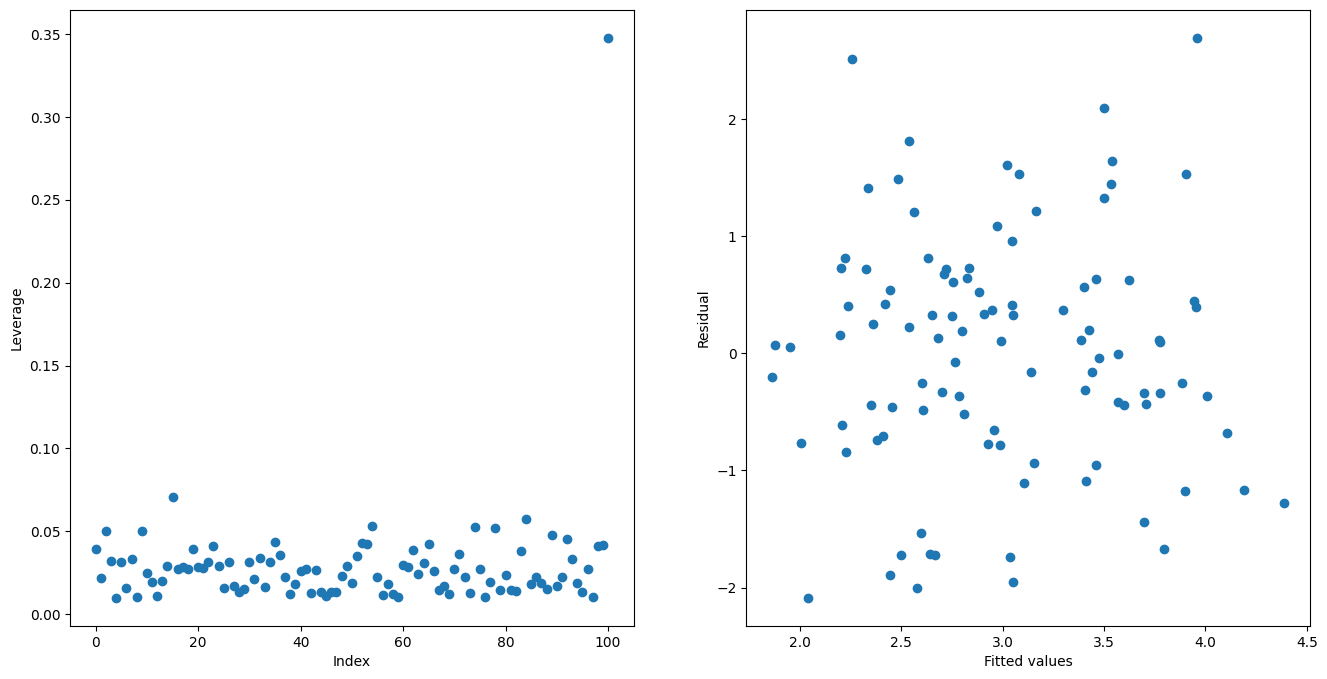

In [703]:
infl = results.get_influence()
ax = subplots(ncols=2,figsize=(16,8))[1]
ax[0].scatter(np.arange(X.shape[0]), infl.hat_matrix_diag)
ax[0].set_xlabel("Index")
ax[0].set_ylabel("Leverage")
ax[1].scatter(results.fittedvalues, infl.get_resid_studentized_external())
ax[1].set_xlabel("Fitted values")
ax[1].set_ylabel("Residual");

# the last point is high leverage. No outliers

In [704]:
X = MS(["x1"]).fit_transform(dfX)
model = sm.OLS(y, X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.217
Model:                            OLS   Adj. R-squared:                  0.209
Method:                 Least Squares   F-statistic:                     27.42
Date:                Wed, 06 Sep 2023   Prob (F-statistic):           9.23e-07
Time:                        12:11:06   Log-Likelihood:                -140.37
No. Observations:                 101   AIC:                             284.7
Df Residuals:                      99   BIC:                             290.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      2.0739      0.201     10.310      0.000       1.675       2.473
x1             1.8760      0.358      5.236      0.000       1.165       2.587
==============================================================================
Omnibus:                        8.232   Durbin-Watson:                   1.636
Prob(Omnibus):                  0.016   Jarque-Bera (JB):               10.781
Skew:                           0.396   Prob(JB):                      0.00456
Kurtosis:                       4.391   Cond. No.                         4.61
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

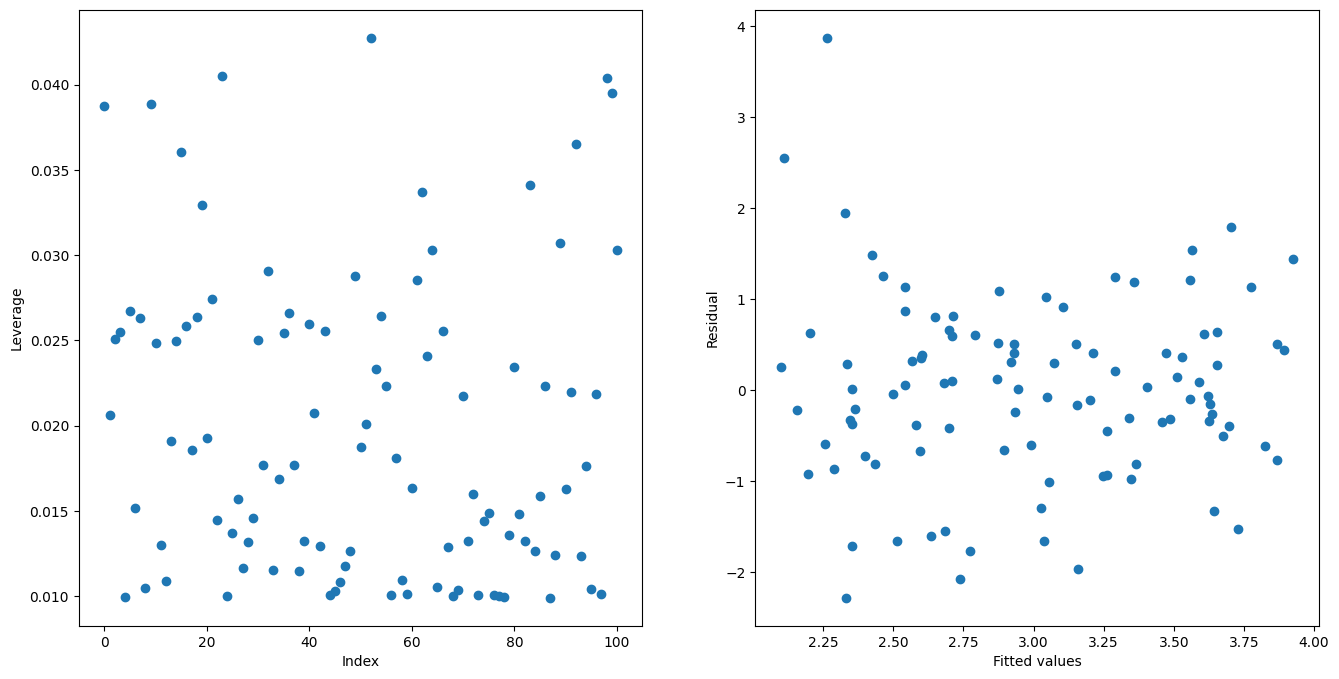

In [705]:
infl = results.get_influence()
ax = subplots(ncols=2,figsize=(16,8))[1]
ax[0].scatter(np.arange(X.shape[0]), infl.hat_matrix_diag)
ax[0].set_xlabel("Index")
ax[0].set_ylabel("Leverage")
ax[1].scatter(results.fittedvalues, infl.get_resid_studentized_external())
ax[1].set_xlabel("Fitted values")
ax[1].set_ylabel("Residual");

# No high leverage. Potentially one outliers?

In [706]:
X = MS(["x2"]).fit_transform(dfX)
model = sm.OLS(y, X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.267
Model:                            OLS   Adj. R-squared:                  0.260
Method:                 Least Squares   F-statistic:                     36.10
Date:                Wed, 06 Sep 2023   Prob (F-statistic):           3.13e-08
Time:                        12:11:07   Log-Likelihood:                -137.01
No. Observations:                 101   AIC:                             278.0
Df Residuals:                      99   BIC:                             283.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      2.2840      0.151     15.088      0.000       1.984       2.584
x2             3.1458      0.524      6.008      0.000       2.107       4.185
==============================================================================
Omnibus:                        0.495   Durbin-Watson:                   1.939
Prob(Omnibus):                  0.781   Jarque-Bera (JB):                0.631
Skew:                          -0.041   Prob(JB):                        0.729
Kurtosis:                       2.621   Cond. No.                         5.84
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

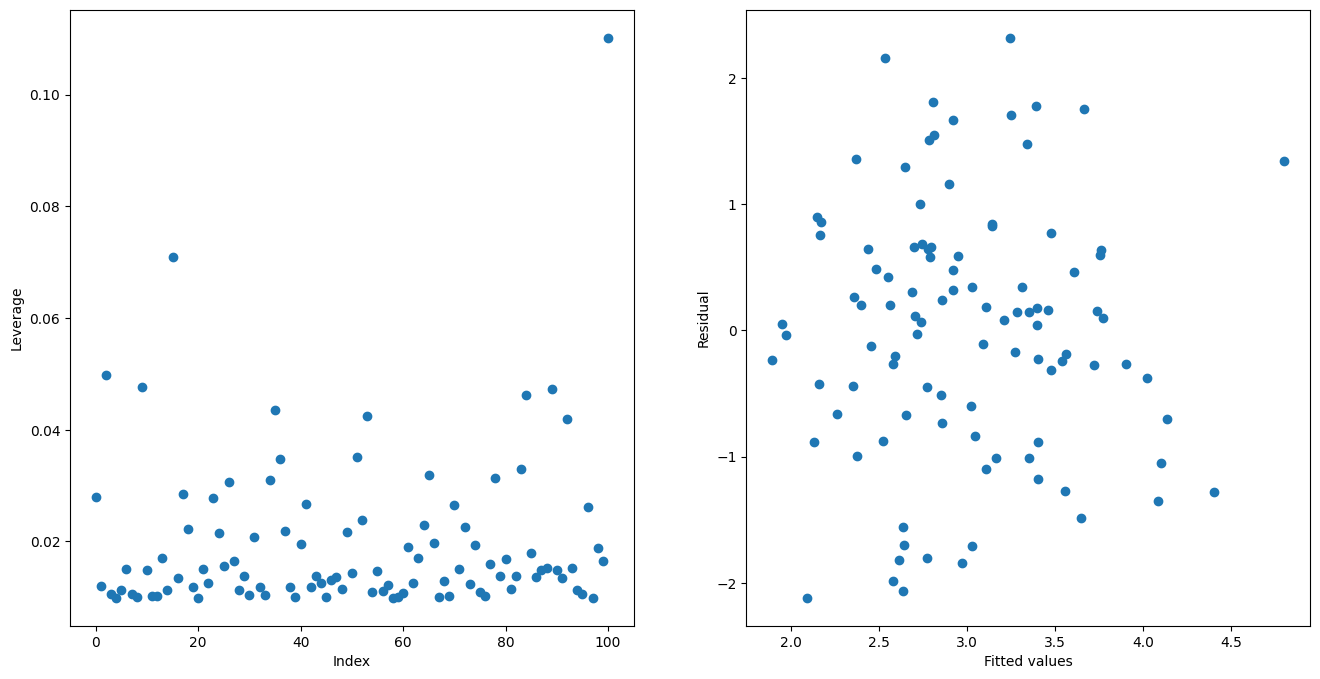

In [707]:
infl = results.get_influence()
ax = subplots(ncols=2,figsize=(16,8))[1]
ax[0].scatter(np.arange(X.shape[0]), infl.hat_matrix_diag)
ax[0].set_xlabel("Index")
ax[0].set_ylabel("Leverage")
ax[1].scatter(results.fittedvalues, infl.get_resid_studentized_external())
ax[1].set_xlabel("Fitted values")
ax[1].set_ylabel("Residual");

# the last point is high leverage. No outliers

In [708]:
# Exercise 15

Boston = load_data("Boston")

y = Boston["crim"]
plot = []
for column in Boston.columns.drop("crim"):
    X = MS([column]).fit_transform(Boston)
    model = sm.OLS(y, X)
    results = model.fit()
    plot.append(results.params[1])
    print(f"** {column}:\n {summarize(results)}\n")


# It seems that for every predictor there is a statistically significant impact on the response, except for chas (Charles river dummy variable)

** zn:
              coef  std err       t  P>|t|
intercept  4.4537    0.417  10.675    0.0
zn        -0.0739    0.016  -4.594    0.0

** indus:
              coef  std err      t  P>|t|
intercept -2.0637    0.667 -3.093  0.002
indus      0.5098    0.051  9.991  0.000

** chas:
              coef  std err      t  P>|t|
intercept  3.7444    0.396  9.453  0.000
chas      -1.8928    1.506 -1.257  0.209

** nox:
               coef  std err       t  P>|t|
intercept -13.7199    1.699  -8.073    0.0
nox        31.2485    2.999  10.419    0.0

** rm:
               coef  std err      t  P>|t|
intercept  20.4818    3.364  6.088    0.0
rm         -2.6841    0.532 -5.045    0.0

** age:
              coef  std err      t  P>|t|
intercept -3.7779    0.944 -4.002    0.0
age        0.1078    0.013  8.463    0.0

** dis:
              coef  std err       t  P>|t|
intercept  9.4993    0.730  13.006    0.0
dis       -1.5509    0.168  -9.213    0.0

** rad:
              coef  std err       t  P>|t|
in

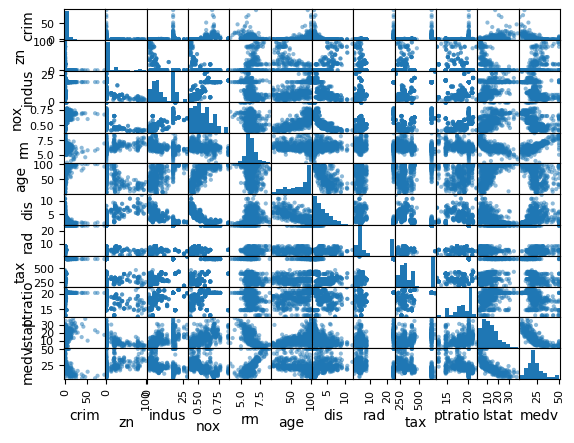

In [709]:
pd.plotting.scatter_matrix(Boston[Boston.columns.drop("chas")]);

In [710]:
X = MS(Boston.columns.drop("crim")).fit_transform(Boston)
model = sm.OLS(y, X)
results2 = model.fit()
results2.summary()

# b. We can reject the null hypothesis for zn, nox, dis, rad, lstat, medv

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   crim   R-squared:                       0.449
Model:                            OLS   Adj. R-squared:                  0.436
Method:                 Least Squares   F-statistic:                     33.52
Date:                Wed, 06 Sep 2023   Prob (F-statistic):           2.03e-56
Time:                        12:11:09   Log-Likelihood:                -1655.4
No. Observations:                 506   AIC:                             3337.
Df Residuals:                     493   BIC:                             3392.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     13.7784      7.082      1.946      0.052      -0.136      27.693
zn             0.0457      0.019      2.433      0.015       0.009       0.083
indus         -0.0584      0.084     -0.698      0.486      -0.223       0.106
chas          -0.8254      1.183     -0.697      0.486      -3.150       1.500
nox           -9.9576      5.290     -1.882      0.060     -20.351       0.436
rm             0.6289      0.607      1.036      0.301      -0.564       1.822
age           -0.0008      0.018     -0.047      0.962      -0.036       0.034
dis           -1.0122      0.282     -3.584      0.000      -1.567      -0.457
rad            0.6125      0.088      6.997      0.000       0.440       0.784
tax           -0.0038      0.005     -0.730      0.466      -0.014       0.006
ptratio       -0.3041      0.186     -1.632      0.103      -0.670       0.062
lstat          0.1388      0.076      1.833      0.067      -0.010       0.288
medv          -0.2201      0.060     -3.678      0.000      -0.338      -0.103
==============================================================================
Omnibus:                      663.436   Durbin-Watson:                   1.516
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            80856.852
Skew:                           6.579   Prob(JB):                         0.00
Kurtosis:                      63.514   Cond. No.                     1.24e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.24e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [711]:
# list(results2.params[1:])
# list(plot)
results2.params

intercept    13.778394
zn            0.045710
indus        -0.058350
chas         -0.825378
nox          -9.957587
rm            0.628911
age          -0.000848
dis          -1.012247
rad           0.612465
tax          -0.003776
ptratio      -0.304073
lstat         0.138801
medv         -0.220056
dtype: float64

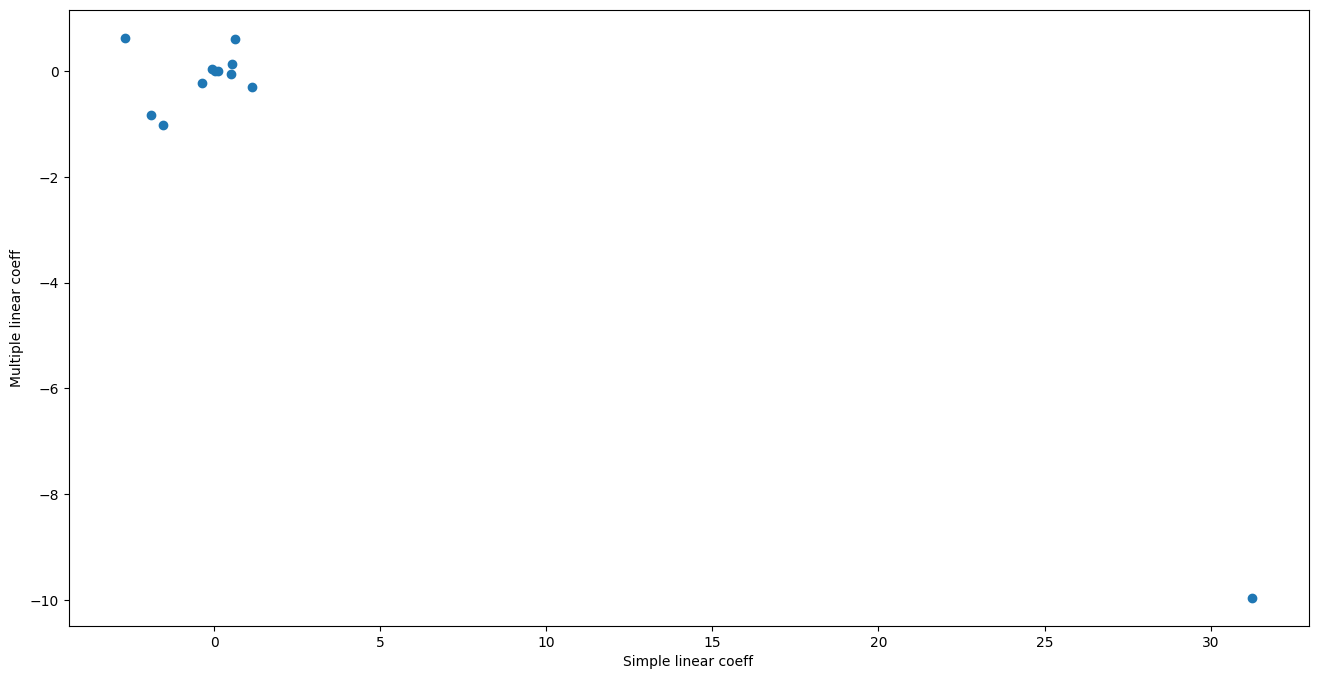

In [712]:
# c. In the simple linear regression, there was always statistically significant for all variables except one. But in the multiple linear regression setting, now only a few variable are statistically significant.
ax = subplots(figsize=(16,8))[1]
ax.scatter(plot, list(results2.params[1:]))
ax.set_xlabel("Simple linear coeff")
ax.set_ylabel("Multiple linear coeff");


In [713]:
for column in Boston.columns.drop("crim"):
    X = MS([poly(column,degree=3)]).fit_transform(Boston)
    model = sm.OLS(y, X)
    results = model.fit()
    print(f"** {column}:\n {summarize(results)}\n")

# There seems to be multiple variable that have non linear statistically significant relationship with the answer (like nox or age for example)

** zn:
                           coef  std err      t  P>|t|
intercept               3.6135    0.372  9.709  0.000
poly(zn, degree=3)[0] -38.7498    8.372 -4.628  0.000
poly(zn, degree=3)[1]  23.9398    8.372  2.859  0.004
poly(zn, degree=3)[2] -10.0719    8.372 -1.203  0.230

** indus:
                              coef  std err       t  P>|t|
intercept                  3.6135    0.330  10.950  0.000
poly(indus, degree=3)[0]  78.5908    7.423  10.587  0.000
poly(indus, degree=3)[1] -24.3948    7.423  -3.286  0.001
poly(indus, degree=3)[2] -54.1298    7.423  -7.292  0.000

** chas:
                            coef  std err      t  P>|t|
intercept                3.7414    0.396  9.454  0.000
poly(chas, degree=3)[0] -0.0569    0.012 -4.939  0.000
poly(chas, degree=3)[1] -0.0988    0.014 -6.891  0.000
poly(chas, degree=3)[2] -0.3508    0.282 -1.242  0.215

** nox:
                            coef  std err       t  P>|t|
intercept                3.6135    0.322  11.237    0.0
poly(nox, de